# Spark Funds - Investment Analysis

- Wants to invest between **5 to 15 Million USD per round of Investment**

- Wants to invest **only in English-speaking countries**
  (consider a country to be English speaking **only if English is one of the official languages in that country**)

- **List of countries** where English is official language in the country - https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

### Strategy for Investment
Spark Funds wants to **invest where most other investors are investing**

### Business Objective

1. Identify **best sector, countries, and a suitable investment type** for making investments
2. Overall strategy is to invest where others are investing

### Goals of data analysis

1. Investment type analysis - Comparing the typical investment amounts in the venture, seed, angel, private equity
2. Country analysis - Heavily invested in the past
3. Sector analysis - istribution of investments across the 8 main sectors - mapped to category list(primary sector) in mapping.csv file

### Data Source

Investment data from crunchbase.com

# Checkpoints - Part 1

#### Analyse the give datasets such as `companies.csv` & `rounds2.csv`
#### Load the companies and rounds data into two data frames

In [1028]:
#Import the required libraries

import pandas as pd

In [1029]:
import numpy as np

In [1030]:
# read the file with basic data of 'companies'

companies = pd.read_csv('companies.csv', encoding = 'ISO-8859-1')

In [1031]:
#top 5 rows in the 'companies' data file

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [142]:
#number of rows & columns in 'companies'
companies.shape

(66368, 10)

In [1032]:
# number of rows in 'companies'
companies.shape[0]

66368

In [1033]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [1034]:
# 66368rows & 10 columns in the Data frame
# find the number of missing values in each column of 'companies' data frame

companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [1037]:
#Find the percentage of missing values in each column

100 * (companies.isnull().sum() / companies.shape[0])

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [1038]:
# read the file with funding round details

rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')

In [1039]:
#top 5 rows in the 'rounds2' data file

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [149]:
#number of rows & columns in 'rounds2'

rounds2.shape

(114949, 6)

In [1040]:
#number of rows in 'rounds2'

rounds2.shape[0]

114949

In [1041]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1042]:
# 114949rows & 6columns in the 'rounds2' Data frame
# find the number of missing values in 'rounds2'

rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [1043]:
#Find the percentage of missing values in each column of 'rounds2'

100 * (rounds2.isnull().sum() / rounds2.shape[0])

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

**72%** of the funding_round_code column has missing values. So, it's better to delete that column completely

**1. How many unique companies are present in rounds2?**

To find the unique companies in rounds2, we have to convert the 'company_permalink' column string to either lowercase or uppercase

In [1044]:
# convert the text in company_permalink column to lowercase

rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda link: link.lower())

rounds2['company_permalink']

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ãasys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object

In [156]:
# number of unique companies are present in rounds2 data frame

len(rounds2['company_permalink'].unique())

66370

**2. How many unique companies are present in companies?**

To find the unique companies in companies, we have to convert the 'permalink' column string to either lowercase or uppercase

In [1046]:
# convert the text in permalink column of companies dataframe to lowercase

companies['permalink'] = companies['permalink'].apply(lambda link: link.lower())

companies['permalink']

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ãasys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object

In [1047]:
# number of unique companies are present in companies data frame

len(companies['permalink'].unique())

66368

**3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column**

**Permalink** `column is the unique ID of the company in companies Data frame`
(As given in the description of Companies Table)

**4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.**

Answer is **'Yes'** from the below analysis

In [1050]:
#list of unique companies in 'companies' datframe

companiesList = list(np.sort(companies['permalink'].unique()))

In [1051]:
#list of unique companies in 'round2' datframe

round2List = list(np.sort(rounds2['company_permalink'].unique()))

In [1052]:
# company in the rounds2 data frame which are not present in companies data frame?

set(round2List) - set(companiesList)

{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

In [1053]:
#there are 7 companies in rounds2 data frame which are not present in companies data frame

len(set(round2List) - set(companiesList))

7

Let's do the above analysis in vice versa

In [1055]:
# company in the companies data frame which are not present in rounds2 data frame?

set(companiesList) - set(round2List)

{'/organization/e-cã\x9abica',
 '/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80'}

In [164]:
#there are 5 companies in companiesList data frame which are not present in rounds2 data frame

len(set(companiesList) - set(round2List))

5

#### The above 5 companies are similar to the first set of companies except 2

In [165]:
data = {'round2List': ['/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'], 'CompaniesList': ['/organization/e-cã\x9abica',
 '/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 'NaN',                                               
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 'NaN',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80']}

In [166]:
pd.DataFrame.from_dict(data)

,round2List,CompaniesList
0,/organization/e-cãbica,/organization/e-cãbica
1,/organization/energystone-games-çµç³æ¸¸æ,/organization/energystone-games-çµçÿ³æ¸¸æ
2,/organization/huizuche-com-æ ç§ÿè½¦,/organization/huizuche-com-æ ç§è½¦
3,/organization/magnet-tech-ç£ç³ç§æ,NaN
4,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...
5,/organization/weiche-tech-åè½¦ç§æ,NaN
6,/organization/zengame-ç¦ æ¸¸ç§æ,/organization/zengame-ç¦ æ¸¸ç§æ


#### Those two exceptions are

1. '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80'
2. '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80'

**5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame**

Name the merged frame **master_frame**

**How many observations are present in master_frame?**

In [ ]:
# Merge the two data frames 
# so that all variables (columns) in the companies frame are added to the rounds2 data frame

In [1057]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1058]:
#using inner merge - inner: for intersection of keys from both frames, preserve the order of the left keys.

master_frame = rounds2.merge(companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [1059]:
master_frame.shape

(114942, 16)

7 rows from the 'rounds2' are missing

Reason: 
- After merging two data frame, 7 rows are missing
- company in the rounds2 data frame which are not present in companies data frame

In [1064]:
len(set(round2List) - set(companiesList))

7

In [1063]:
set(round2List) - set(companiesList)

{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

In [1069]:
#Number of missing values in master_frame column

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [1070]:
master_frame.duplicated().sum()

#there are are no duplicated rows

0

In [1065]:
#Percentage of missing values in master_frame column

100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
permalink                   0.000000
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
dtype: float64

#### Cleaning unnecessary column based on analysis

`funding_round_code` - **72% of missing values** - can't impute large amount of missing values. so, Delete column

`permalink` - company_permalink & permalink has same information. So we can delete one of the column. Let's delete permalink

`homepage_url` - **5% of missing values** - Not an important information for this analysis. so, Delete column

`state_code` - **9% of missing values** - Not an important information for this analysis. so, Delete column

`region`- **9% of missing values** - Not an important information for this analysis. so, Delete column

`city` - **9% of missing values** - Not an important information for this analysis. so, Delete column

`founded_at` - **18% of missing values** - Not an important information for this analysis. so, Delete column

In [1072]:
# Remove the unnecessary columns such as 'funding_round_code', 'permalink', 'homepage_url', 'state_code', 'region', 'city', 'founded_at'

master_frame.drop(columns = ['funding_round_code', 'permalink', 'homepage_url', 'state_code', 'region', 'city', 'founded_at'], inplace=True)

In [1075]:
#number of missing values 

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19984
name                           1
category_list               3407
status                         0
country_code                8671
dtype: int64

In [1073]:
#Percentage of missing values

100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.386160
name                        0.000870
category_list               2.964104
status                      0.000000
country_code                7.543805
dtype: float64

#### Other columns with missing values such as `raised_amount_usd`, `category_list` & `country_code` are important for this analysis. So, Let's deal with that in row wise analysis

In [1078]:
master_frame.shape

(114942, 9)

# Checkpoint 2: Funding Type Analysis

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

**(venture, angel, seed, and private equity)**

In [1079]:
funding_type = ['venture', 'angel', 'seed', 'private_equity']

In [1080]:
#only choose the investments with required 'funding_round_type' for further analysis

master_frame = master_frame.loc[master_frame['funding_round_type'].isin(funding_type)]

In [1082]:
#total number investments made in 'venture', 'angel', 'seed' & 'private_equity'

master_frame.shape

(94390, 9)

In [1085]:
#number of missing values 

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          13764
name                           1
category_list               2494
status                         0
country_code                7314
dtype: int64

In [1083]:
#Percentage of missing values

100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          14.582053
name                        0.001059
category_list               2.642229
status                      0.000000
country_code                7.748702
dtype: float64

#### Now, we have impute the `raised_amount_usd` missing values because this variable is very important for this analysis

In [1087]:
#Overall statistical view of these four 'funding_round_type' with 'raised_amount_usd'

master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         4860.0  9.586945e+05  7.404397e+06  0.0   
private_equity                1936.0  7.330859e+07  1.981135e+08  0.0   
seed                         23602.0  7.197796e+05  2.221772e+06  0.0   
venture                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                      
                           25%         50%         75%           max  
funding_round_type                                                    
angel                150000.00    400000.0   1000000.0  4.945120e+08  
private_equity      5000000.00  20000000.0  75000000.0  4.745460e+09  
seed                  55000.00    275000.0   1000000.0  2.000000e+08  
venture             1600901.75   5000000.0  12000000.0  1.760000e+10

#### Median for each funding type will be the right value for Imputing. Because Arithmetic mean values will be skewed by the Outliers

In [1090]:
#Median for the four 'funding_round_type'

master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,275000.0
venture,5000000.0


In [1091]:
#imputing the funding_round_type 'venture' with its median value - 5000000.0

master_frame.loc[((master_frame['raised_amount_usd'].isnull()) & (master_frame['funding_round_type'] == 'venture')), 'raised_amount_usd'] = 5000000.0

In [1092]:
#imputing the funding_round_type 'seed' with its median value - 275000.0

master_frame.loc[((master_frame['raised_amount_usd'].isnull()) & (master_frame['funding_round_type'] == 'seed')), 'raised_amount_usd'] = 275000.0

In [1093]:
#imputing the funding_round_type 'private_equity' with its median value - 20000000.0

master_frame.loc[((master_frame['raised_amount_usd'].isnull()) & (master_frame['funding_round_type'] == 'private_equity')), 'raised_amount_usd'] = 20000000.0

In [1094]:
#imputing the funding_round_type 'angel' with its median value - 400000.0

master_frame.loc[((master_frame['raised_amount_usd'].isnull()) & (master_frame['funding_round_type'] == 'angel')), 'raised_amount_usd'] = 400000.0

In [1095]:
#Percentage of missing values

100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
name                       0.001059
category_list              2.642229
status                     0.000000
country_code               7.748702
dtype: float64

In [1096]:
#Number of missing values

master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
name                          1
category_list              2494
status                        0
country_code               7314
dtype: int64

In [1097]:
#total number of remaining rows

master_frame.shape[0]

94390

There are **2494rows(2.6%)** with missing values in category_list

Since we don't clearly know the right category_list of these investments and because of very small percentage of observation, We can delete these rows

In [ ]:
#removing category_list with null values

master_frame = master_frame.loc[~(master_frame['category_list'].isnull())]

In [1100]:
#After removing the missing values in category_list, remaining number of rows will be

94390 - 2494

91896

In [1101]:
#remaining number of rows
master_frame.shape

(91896, 9)

In [1102]:
#one row with null value in 'name' column

master_frame.loc[master_frame['name'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
98688,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,01-03-2012,25000.0,NaN,Startups,closed,USA


In [1103]:
#we can impute this missing value

master_frame.loc[master_frame['name'].isnull(), 'name'] = 'tell-it-in'

In [1104]:
#checking

master_frame.loc[master_frame['company_permalink'] == '/organization/tell-it-in']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
98688,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,01-03-2012,25000.0,tell-it-in,Startups,closed,USA


In [1108]:
#Percentage of missing values

100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
name                       0.000000
category_list              0.000000
status                     0.000000
country_code               6.487769
dtype: float64

In [1105]:
#Number of missing values

master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
name                          0
category_list                 0
status                        0
country_code               5962
dtype: int64

In [1109]:
#remaining number of rows
master_frame.shape

(91896, 9)

#### Its better to remove the `country_code` rows with missing values because Imputing the country code with 'mode' will skew the data

In [1110]:
#remove country_code rows with null values 

master_frame = master_frame.loc[~(master_frame['country_code'].isnull())]

In [1112]:
#old number of rows - removed rows

91896 - 5962

85934

In [1113]:
#confirming the rows

master_frame.shape

(85934, 9)

In [373]:
100 * (master_frame.isnull().sum() / master_frame.shape[0])

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [374]:
master_frame.shape

(85934, 9)

In [1114]:
100 * (master_frame.shape[0] / 114942)

74.76292390944998

#### we have removed 25% of the rows from master_frame in data cleaning

**1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)?**

In [1115]:
#Overall statistics of 'funding_round_type' & 'raised_amount_usd'

master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         5417.0  8.642653e+05  6.952915e+06  0.0   
private_equity                2055.0  6.777034e+07  1.906579e+08  0.0   
seed                         26438.0  6.522442e+05  2.052840e+06  0.0   
venture                      52024.0  1.117942e+07  8.458644e+07  0.0   

                                                                      
                          25%         50%          75%           max  
funding_round_type                                                    
angel                200000.0    400000.0    770000.00  4.945120e+08  
private_equity      6000000.5  20000000.0  67273600.00  4.745460e+09  
seed                 100000.0    275000.0    750000.00  2.000000e+08  
venture             1955812.5   5000000.0  10806384.25  1.760000e+10

### We have to choose between `Median` & `Mean` for the representative value of the investment amount for each of the four funding types

#### Let's do the Outlier analysis for this four funding type before we do that

In [1126]:
#importing necessary libraries for Data visualisation

import matplotlib.pyplot as plt
%matplotlib inline

In [1127]:
import seaborn as sns

In [1128]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

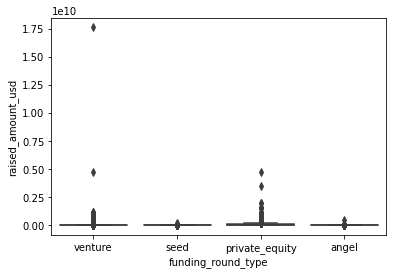

In [1129]:
#box plotting the 'funding_round_type' & 'raised_amount_usd'

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)

#### raised_amount_usd is heavily skewed by the outliers. So, let's boxplot only for raised_amount_usd less than 2000000000 (2 Billion)

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

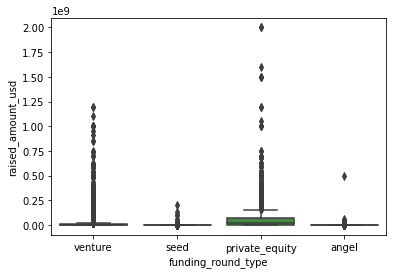

In [1130]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[master_frame['raised_amount_usd'] <= 2000000000])

#### Still, the box plot is heavily skewed by the outliers. So, let's boxplot only for raised_amount_usd less than 20000000(20Million)

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

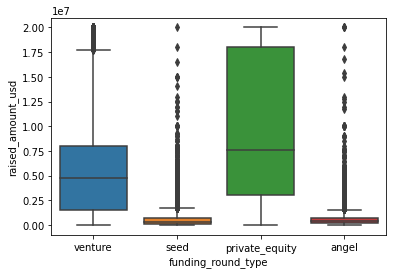

In [1131]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[master_frame['raised_amount_usd'] <= 20000000])

### Mean values are heavily skewed by the Outliers. So, its better to take Median as a representative values of Investments for Each of these Funding Types

In [1140]:
#common representative amount of investment in each funding type

master_frame.groupby('funding_round_type').median().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,400000.0
seed,275000.0


<Figure size 1440x720 with 0 Axes>

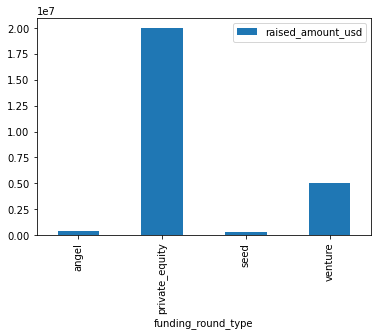

In [1141]:
#Plot for common representative amount of investment in each funding type

plt.figure(figsize=(20,10))

master_frame.groupby('funding_round_type').median().plot.bar()
plt.show()

### Lets omit the outliers to see the common representative values of Venture

In [1142]:
#calculating the higher fence value for venture

#calculating the 75th percentile for venture
VQ3 = master_frame.loc[master_frame['funding_round_type'] == 'venture'].quantile(0.75)[0]



#calculating IQR for venture
#IQR = IQ3 - IQ1(25th percentile)

VIQR = VQ3 - master_frame.loc[master_frame['funding_round_type'] == 'venture'].quantile(0.25)[0]


#calculating the higher fence for venture
#Higher fence = IQ3 + (1.5 * IQR)

venture_h_fence = VQ3 + (1.5 * VIQR)
#venture higher fence value 24082241.875

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

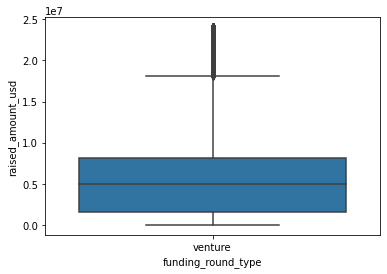

In [1143]:
#For the venture funding type, we have found the higher fence and drawn a box plot to see the representative values

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[(master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] <= venture_h_fence)])

### Lets omit the outliers to see the common representative values of Seed

In [1144]:
#calculating the higher fence value for Seed

#calculating the 75th percentile for seed
SQ3 = master_frame.loc[master_frame['funding_round_type'] == 'seed'].quantile(0.75)[0]
#750000.0

#calculating IQR for seed
#IQR = IQ3 - IQ1(25th percentile)

SIQR = SQ3 - master_frame.loc[master_frame['funding_round_type'] == 'seed'].quantile(0.25)[0]
#750000.0 - 100000.0

#calculating the higher fence for venture
#Higher fence = IQ3 + (1.5 * IQR)

seed_h_fence = SQ3 + (1.5 * SIQR)
#750000.0 + (1.5 * 650000.0)
#Seed higher fence value - 1725000.0

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

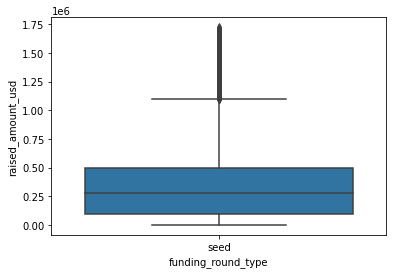

In [1145]:
#For the seed funding type, we have found the higher fence and drawn a box plot to see the representative values

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[(master_frame['funding_round_type'] == 'seed') & (master_frame['raised_amount_usd'] <= seed_h_fence)])

### Lets omit the outliers to see the common representative values of Private equity

In [1146]:
#calculating the higher fence value for Private quity

#calculating the 75th percentile for see
PQ3 = master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].quantile(0.75)[0]
#67273600.0

#calculating IQR for Private quity
#IQR = IQ3 - IQ1(25th percentile)

PIQR = PQ3 - master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].quantile(0.25)[0]
#67273600.0 - 6000000.5

#calculating the higher fence for venture
#Higher fence = IQ3 + (1.5 * IQR)

private_h_fence = PQ3 + (1.5 * PIQR)
#67273600.0 + (1.5 * 61273599.5)
#Private quity fence value - 159183999.25

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

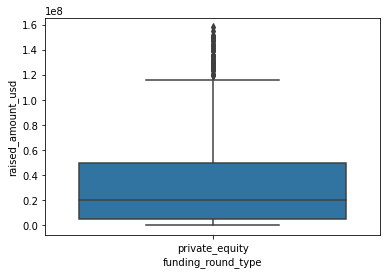

In [1147]:
#For the Private equity funding type, we have found the higher fence and drawn a box plot to see the representative values

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[(master_frame['funding_round_type'] == 'private_equity') & (master_frame['raised_amount_usd'] <= private_h_fence)])

### Lets omit the outliers to see the common representative values of Angel

In [1148]:
#calculating the higher fence value for Angel

#calculating the 75th percentile for Angel
AQ3 = master_frame.loc[master_frame['funding_round_type'] == 'angel'].quantile(0.75)[0]
#770000.00

#calculating IQR for Angel
#IQR = IQ3 - IQ1(25th percentile)

AIQR = AQ3 - master_frame.loc[master_frame['funding_round_type'] == 'angel'].quantile(0.25)[0]
#770000.0 - 200000.0

#calculating the higher fence for venture
#Higher fence = IQ3 + (1.5 * IQR)

Angel_h_fence = AQ3 + (1.5 * AIQR)
#770000.0 + (1.5 * 570000.0)
#Angel fence value - 1625000.0

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

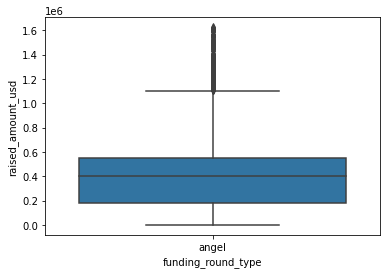

In [1149]:
#For the Angel funding type, we have found the higher fence and drawn a box plot to see the representative values

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame.loc[(master_frame['funding_round_type'] == 'angel') & (master_frame['raised_amount_usd'] <= Angel_h_fence)])

### Mean values are heavily skewed by the Outliers. So, its better to take Median as a representative values of Investments for Each of these Funding Types

In [1150]:
master_frame.groupby('funding_round_type').median().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,400000.0
seed,275000.0


<Figure size 1440x720 with 0 Axes>

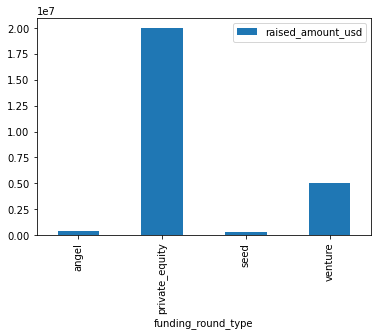

In [1151]:
#Plot for common representative amount of investment in each funding type

plt.figure(figsize=(20,10))

master_frame.groupby('funding_round_type').median().plot.bar()
plt.show()

In [1152]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,5417.0,8.642653e+05,6.952915e+06,0.0,200000.0,400000.0,770000.00,4.945120e+08
private_equity,2055.0,6.777034e+07,1.906579e+08,0.0,6000000.5,20000000.0,67273600.00,4.745460e+09
seed,26438.0,6.522442e+05,2.052840e+06,0.0,100000.0,275000.0,750000.00,2.000000e+08
venture,52024.0,1.117942e+07,8.458644e+07,0.0,1955812.5,5000000.0,10806384.25,1.760000e+10


## Percentile Analysis

#### 75th percentile of Angel & Seed funding type is only in Lakhs (770000.00 & 750000.00 respectively). Spark Funds wants to invest between 5M to 15M. So, lets omit these two funding types

### Percentile Analysis for Private Equity

In [1153]:
#From 21st percentile
master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].quantile(0.21)[0]

5000000.0

In [1154]:
#to 40th percentile
master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].quantile(0.40)[0]

15000000.0

In [1155]:
40-21

19

In [1156]:
master_frame.loc[master_frame['funding_round_type'] == 'private_equity'].quantile(0.50)[0]

20000000.0

#### Only 19% of the funding in Private Equity is between 5Million to 15Million USD
#### And the median for Private Equity is 20Million. So this funding type won't workout for Spark funds

### Percentile Analysis for Venture

In [1157]:
#From 45th percentile
master_frame.loc[master_frame['funding_round_type'] == 'venture'].quantile(0.45)[0]

5000000.0

In [1158]:
#to 82nd percentile
master_frame.loc[master_frame['funding_round_type'] == 'venture'].quantile(0.82)[0]

15000000.0

In [1159]:
82-45

37

### 82% - 45% = More than 37% of the funding in venture funding type is between 
### 5Million to 15Million USD

### And also the median raised amount for venture type is 5Million USD

In [1160]:
master_frame.loc[master_frame['funding_round_type'] == 'venture'].quantile(0.50)[0]

5000000.0

### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round and above analysis, ***Venture Funding round type*** would be right fit for them

# Checkpoint 3: Country Analysis

In [1164]:
#since, we have choosen the funding type for Spark Funds, Let's only extract the venture funding_round_type

master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']

In [1165]:
#checking the top5 rows
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN


In [1166]:
master_frame.shape

(52024, 9)

In [1167]:
#List of countries which received more funding

countries_highest_funding = master_frame.groupby(['country_code', 'funding_round_type']).sum().sort_values('raised_amount_usd', ascending=False)

countries_highest_funding

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,4.305230e+11
CHN,venture,4.185392e+10
GBR,venture,2.119281e+10
IND,venture,1.508651e+10
CAN,venture,9.907218e+09
...,...,...
ECU,venture,9.658500e+05
MCO,venture,6.570000e+05
SAU,venture,5.000000e+05


In [1168]:
#top nine countries with highest funding in venture funding type

top9 = countries_highest_funding.head(9)

top9

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,4.305230e+11
CHN,venture,4.185392e+10
GBR,venture,2.119281e+10
IND,venture,1.508651e+10
CAN,venture,9.907218e+09
FRA,venture,7.521851e+09
ISR,venture,7.409350e+09
DEU,venture,7.401922e+09
JPN,venture,3.362647e+09


In [1173]:
top9 = top9.reset_index()

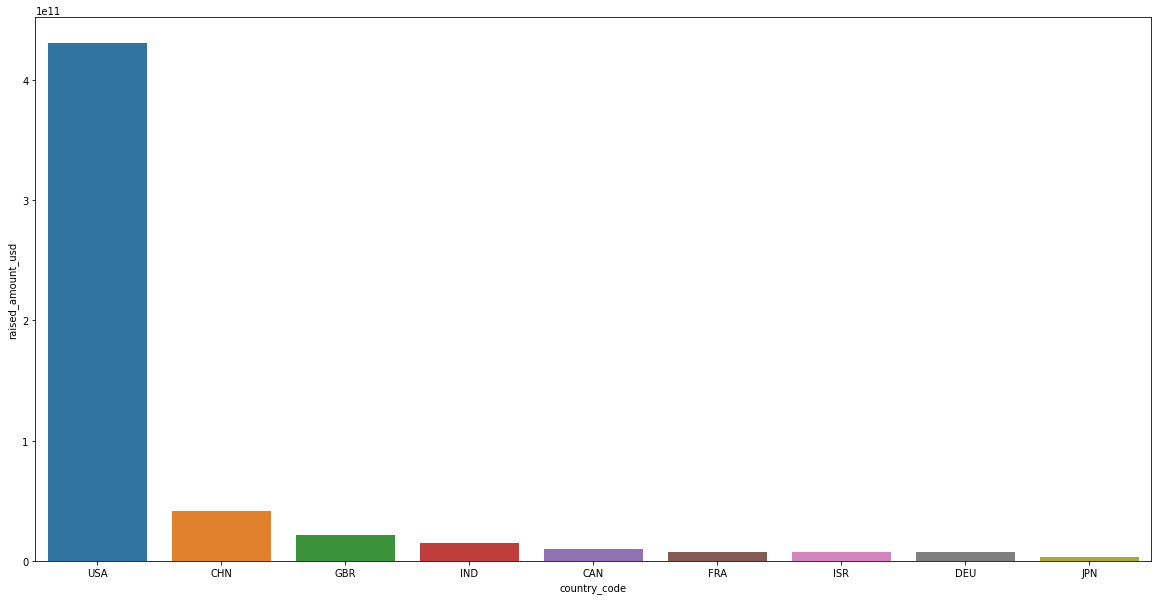

In [1459]:
#Visualisation of top nine countries with highest funding in venture funding type

plt.figure(figsize=(20,10))

sns.barplot(top9['country_code'], top9['raised_amount_usd'])
plt.show()

**List of countries where English is official language in the country**

https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

As per the details in the above link & top9 country list

### Top 3 Countries English-Speaking Countries are

considering a country to be English speaking only if English is one of the official languages in that country

### USA - Top English-speaking country
[United States of America]

### GBR - Second English-speaking country
[United Kingdom]

### IND - Third English-speaking country
[India]

#### Omitting CHN (CHINA) because English is not an official language there

In [1180]:
#Top3 English-Speaking Countries

countryCode = ['USA', 'GBR', 'IND']

In [1181]:
#Extract only the top3 countries in country code
master_frame = master_frame.loc[master_frame['country_code'].isin(countryCode)]

master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...
114913,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,ZYOMYX,Biotechnology,operating,USA
114915,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,ZYOMYX,Biotechnology,operating,USA
114916,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,ZYOMYX,Biotechnology,operating,USA
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,Zyrra,E-Commerce,operating,USA


In [1183]:
#checking if I only filtered investments from these 3 countries

master_frame['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

# Checkpoint 4: Sector Analysis 1

In [1184]:
#checking the data frame

master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...
114913,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,ZYOMYX,Biotechnology,operating,USA
114915,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,ZYOMYX,Biotechnology,operating,USA
114916,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,ZYOMYX,Biotechnology,operating,USA
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,Zyrra,E-Commerce,operating,USA


In [1185]:
# Extract the primary sector of each category list from the category_list column

master_frame['primary_sector'] = master_frame['category_list'].apply(lambda word: str(word).split('|')[0])

master_frame['primary_sector']

0                         Media
1         Application Platforms
5                      Software
10                    Analytics
11                    Analytics
                  ...          
114913            Biotechnology
114915            Biotechnology
114916            Biotechnology
114927               E-Commerce
114929            Biotechnology
Name: primary_sector, Length: 41283, dtype: object

In [1198]:
#checking the newly derived column 'primary_sector' (top40 rows)
master_frame[['company_permalink', 'category_list', 'primary_sector']].head(40)

,company_permalink,category_list,primary_sector
0,/organization/-fame,Media,Media
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,Application Platforms
5,/organization/004-technologies,Software,Software
10,/organization/0xdata,Analytics,Analytics
11,/organization/0xdata,Analytics,Analytics
12,/organization/0xdata,Analytics,Analytics
22,/organization/1-mainstream,Apps|Cable|Distribution|Software,Apps
28,/organization/10-minutes-with,Education,Education
33,/organization/1000lookz,Beauty,Beauty
34,/organization/1000memories,Curated Web,Curated Web


In [1186]:
#import the mapping file to analyse

mapping = pd.read_csv('mapping.csv')

In [1187]:
#checking the top 40 rows in mapping data frame
mapping.head(40)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [1188]:
#check the blanks column for number of 1's

mapping['Blanks'].sum()

1

In [1189]:
#remove the first row & 'Blanks' column 

mapping.drop(index=0, columns='Blanks', inplace=True)

In [1190]:
mapping

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,1,0,0,0,0,0
685,Wireless,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,1,0


In [1191]:
mapping.shape

(687, 9)

In [1192]:
#set the category_list as index

mapping.set_index('category_list', inplace=True)

In [1193]:
#find the the column names with value = 1 and setting it to column 'main_sector'

mapping['main_sector'] = mapping.idxmax(axis=1)
mapping['main_sector']

category_list
3D                                            Manufacturing
3D Printing                                   Manufacturing
3D Technology                                 Manufacturing
Accounting          Social, Finance, Analytics, Advertising
Active Lifestyle                                     Health
                                     ...                   
Wholesale                                            Others
Wine And Spirits                              Entertainment
Wireless                                      Entertainment
Women                                                Others
Young Adults                                         Others
Name: main_sector, Length: 687, dtype: object

In [1194]:
#removing other columns except main_sector in mapping dataframe

mapping = mapping[['main_sector']]

In [1195]:
mapping

,main_sector
category_list,
3D,Manufacturing
3D Printing,Manufacturing
3D Technology,Manufacturing
Accounting,"Social, Finance, Analytics, Advertising"
Active Lifestyle,Health
...,...
Wholesale,Others
Wine And Spirits,Entertainment
Wireless,Entertainment


In [693]:
# rename category_list as primary sector
# master_frame = master_frame.rename(columns={'category_list': 'primary_sector'})

In [1199]:
master_frame.shape

(41283, 10)

In [1205]:
#restting the index number

master_frame.reset_index(inplace=True)

In [1206]:
#removing the unnecessary column index

master_frame.drop(columns='index', inplace=True)

In [1211]:
#reset the mapping index. so that we can easily merge

mapping = mapping.reset_index()

In [1212]:
mapping

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active Lifestyle,Health
...,...,...
682,Wholesale,Others
683,Wine And Spirits,Entertainment
684,Wireless,Entertainment
685,Women,Others


In [1213]:
master_frame['primary_sector'] = master_frame['primary_sector'].apply(lambda sector: sector.capitalize())

In [1216]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application platforms
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,Software
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,Analytics
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,Analytics
...,...,...,...,...,...,...,...,...,...,...
41278,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology
41279,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology
41280,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology
41281,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,Zyrra,E-Commerce,operating,USA,E-commerce


In [1218]:
master_frame.merge(mapping, how='left', left_on='primary_sector', right_on='category_list')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application platforms,NaN,NaN
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,Software,Software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41278,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology,Biotechnology,Cleantech / Semiconductors
41279,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology,Biotechnology,Cleantech / Semiconductors
41280,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,ZYOMYX,Biotechnology,operating,USA,Biotechnology,Biotechnology,Cleantech / Semiconductors
41281,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,Zyrra,E-Commerce,operating,USA,E-commerce,NaN,NaN


In [843]:
41283-41268

15

#### While trying to merge master_frame with mapping file, some rows are missing
#### Let's Analyse that

In [776]:
#number of unique values in primary_sector

len(np.sort(master_frame['primary_sector'].unique()))

577

In [777]:
#number of unique values in category_list

len(np.sort(mapping['category_list'].unique()))

687

In [807]:
#Values which are in mapping file's category_list and not in 'primary_sector'

set(np.sort(mapping['category_list'].unique())) - set(np.sort(master_frame['primary_sector'].unique()))

{'0notechnology',
 '0tural Language Processing',
 '0tural Resources',
 '0vigation',
 'A0lytics',
 'Alter0tive Medicine',
 'Aquaculture',
 'B2B Express Delivery',
 'Big Data A0lytics',
 'Biomass Power Generation',
 'Boating Industry',
 'Building Owners',
 'Business A0lytics',
 'Business Travelers',
 'Can0bis',
 'Career Ma0gement',
 'Casual Games',
 'Charities',
 'Chi0 Internet',
 'Civil Engineers',
 'Cloud Ma0gement',
 'Cloud-Based Music',
 'Collectibles',
 'Contact Ma0gement',
 'Digital Rights Ma0gement',
 'Digital Sig0ge',
 'Direct Advertising',
 'Document Ma0gement',
 'Educatio0l Games',
 'Email Newsletters',
 'Energy Ma0gement',
 'Energy Storage',
 'Event Ma0gement',
 'Face Recognition',
 'Farmers Market',
 'Fi0nce',
 'Fi0nce Technology',
 'Fi0ncial Exchanges',
 'Fi0ncial Services',
 'Field Support Services',
 'Film Distribution',
 'Film Production',
 'Flash Sales',
 'Fleet Ma0gement',
 'Flowers',
 'Fmcg',
 'Forums',
 'Fuel Cells',
 'Funeral Industry',
 'Gay & Lesbian',
 'Gover0nce'

In [838]:
set(np.sort(mapping['category_list'].unique())) - set(np.sort(master_frame['primary_sector'].unique()))

{'Aquaculture',
 'B2b express delivery',
 'Biomass power generation',
 'Boating industry',
 'Building owners',
 'Business travelers',
 'Casual games',
 'Charities',
 'China internet',
 'Civil engineers',
 'Cloud-based music',
 'Collectibles',
 'Direct advertising',
 'Email newsletters',
 'Energy storage',
 'Enterprise 2.na',
 'Face recognition',
 'Farmers market',
 'Field support services',
 'Film distribution',
 'Film production',
 'Flash sales',
 'Flowers',
 'Fmcg',
 'Forums',
 'Fuel cells',
 'Funeral industry',
 'Gay & lesbian',
 'Green',
 'Group buying',
 'Group sms',
 'Handmade',
 'Hedge funds',
 'High school students',
 'High schools',
 'Home owners',
 'Home renovation',
 'Homeless shelter',
 'Ict',
 'Impact investing',
 'Independent music labels',
 'Indians',
 'Jewelry',
 'K-12 education',
 'Landscaping',
 'Language learning',
 'Licensing',
 'Lifestyle products',
 'Local commerce',
 'Lotteries',
 'Low bid auctions',
 'Medical professionals',
 'Micro-enterprises',
 'Microblogging

#### There are some values which has number '0' which is perfect for replacing with character 'na'

In [808]:
mapping

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active Lifestyle,Health
...,...,...
682,Wholesale,Others
683,Wine And Spirits,Entertainment
684,Wireless,Entertainment
685,Women,Others


In [1219]:
#number '0' which is perfect for replacing with character 'na'

mapping['category_list'] = mapping['category_list'].apply(lambda category: category.replace('0', 'na').capitalize())

In [813]:
mapping['category_list'] 

0                    3d
1           3d printing
2         3d technology
3            Accounting
4      Active lifestyle
             ...       
682           Wholesale
683    Wine and spirits
684            Wireless
685               Women
686        Young adults
Name: category_list, Length: 687, dtype: object

In [815]:
len(set(np.sort(mapping['category_list'].unique())) - set(np.sort(master_frame['primary_sector'].unique())))

465

In [839]:
# primary_sector in mapping dataframe but not in category_list

check = list(set(np.sort(master_frame['primary_sector'].unique())) - set(np.sort(mapping['category_list'].unique())))

In [841]:
# list of values which are in primary sector and not in category list

list(set(np.sort(master_frame['primary_sector'].unique())) - set(np.sort(mapping['category_list'].unique())))

['Retirement',
 'Product search',
 'Enterprise 2.0',
 'Greentech',
 'Adaptive equipment',
 'Racing',
 'Natural gas uses',
 'Specialty retail',
 'Rapidly expanding',
 'Biotechnology and semiconductor']

In [840]:
#check if there are any primary_sector in the investment which don't have main_sector

master_frame.loc[master_frame['primary_sector'].isin(check)]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,primary_sector,status,country_code
7759,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,Clean Vehicle Solutions,Natural gas uses,operating,USA
8727,/organization/consensus-point,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,19-04-2011,788374.0,Consensus Point,Enterprise 2.0,operating,USA
8728,/organization/consensus-point,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,18-07-2012,2600000.0,Consensus Point,Enterprise 2.0,operating,USA
10731,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,Dolores Speech Products,Adaptive equipment,operating,USA
13089,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,FIA Formula E,Racing,closed,GBR
13364,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,Five Below,Specialty retail,ipo,USA
13454,/organization/flexport,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,06-08-2015,20000000.0,Flexport,Enterprise 2.0,operating,USA
15862,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,HealthTell,Biotechnology and semiconductor,operating,USA
18963,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,Justinmind,Rapidly expanding,operating,USA
25313,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,Omega Point Research,Product search,closed,USA


In [842]:
master_frame.loc[master_frame['primary_sector'].isin(check)].shape

(15, 9)

In [850]:
#missing primary_sector

missing_category_list = list(set(np.sort(master_frame['primary_sector'].unique())) - set(np.sort(mapping['category_list'].unique())))

In [1222]:
missing_category_df = {'category_list': missing_category_list, 'main_sector': 'Others'}

missing_category_df = pd.DataFrame.from_dict(missing_category_df)

missing_category_df

,category_list,main_sector
0,Retirement,Others
1,Product search,Others
2,Enterprise 2.0,Others
3,Greentech,Others
4,Adaptive equipment,Others
5,Racing,Others
6,Natural gas uses,Others
7,Specialty retail,Others
8,Rapidly expanding,Others
9,Biotechnology and semiconductor,Others


In [1223]:
mapping.shape

(687, 2)

In [1224]:
missing_category_df.shape

(10, 2)

In [1225]:
#newly added categories is 10

687 + 10

697

In [1226]:
# extend missing_category_df to mapping

mapping = mapping.append(missing_category_df)

mapping

,category_list,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active lifestyle,Health
...,...,...
5,Racing,Others
6,Natural gas uses,Others
7,Specialty retail,Others
8,Rapidly expanding,Others


In [1227]:
#resetting the index
mapping = mapping.reset_index()

In [1228]:
mapping

,index,category_list,main_sector
0,0,3d,Manufacturing
1,1,3d printing,Manufacturing
2,2,3d technology,Manufacturing
3,3,Accounting,"Social, Finance, Analytics, Advertising"
4,4,Active lifestyle,Health
...,...,...,...
692,5,Racing,Others
693,6,Natural gas uses,Others
694,7,Specialty retail,Others
695,8,Rapidly expanding,Others


In [1229]:
#removing unordered old index
mapping.drop(columns='index', inplace=True)

In [1230]:
mapping

,category_list,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active lifestyle,Health
...,...,...
692,Racing,Others
693,Natural gas uses,Others
694,Specialty retail,Others
695,Rapidly expanding,Others


In [1231]:
master_frame.merge(mapping, how='inner', left_on='primary_sector', right_on='category_list')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,operating,USA,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
41278,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
41279,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
41280,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
41281,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,Ziftit,Gift Registries|Shopping,closed,USA,Gift registries,Gift registries,Others


In [1233]:
#now, we can properly merged all 41283 rows in master_frame with mapping

master_frame = master_frame.merge(mapping, how='inner', left_on='primary_sector', right_on='category_list')

In [1236]:
master_frame.drop(columns='category_list_y', inplace=True)

In [1237]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
41278,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41279,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41280,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41281,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,Ziftit,Gift Registries|Shopping,closed,USA,Gift registries,Others


# Checkpoint 5: Sector Analysis 2

In [1256]:
master_frame.shape

(41283, 11)

In [1257]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
41278,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41279,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41280,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
41281,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,Ziftit,Gift Registries|Shopping,closed,USA,Gift registries,Others


In [1244]:
# observations of 'venture' funding type  falling within the 5-15 million USD range

master_frame.loc[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
41269,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,25-11-2015,5000000.0,Vector Watch,Watch|Wearables,operating,GBR,Watch,Others
41270,/organization/vision-internet,/funding-round/3890ce75d619c7141afaa4acda1113c4,venture,02-09-2014,5000000.0,Vision Internet,Government Innovation|Internet,operating,USA,Government innovation,Others
41271,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,10500000.0,Washio,Service Industries,operating,USA,Service industries,Others
41272,/organization/windshield,/funding-round/a0dd97cfbfc9906b32d837618e0fb31e,venture,05-05-2015,5000000.0,Windshield,Virtual Workforces,operating,USA,Virtual workforces,Entertainment


Totally **15493 Investments** are made in these **three countries** in **venture funding_round_type**

In [1258]:
# In USA, raised_amount_usd between 5M to 15M

D1 = master_frame.loc[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

D1.shape

(14155, 11)

In [1259]:
# In GBR, raised_amount_usd between 5M to 15M

D2 = master_frame.loc[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

D2.shape

(845, 11)

In [1260]:
# In IND, raised_amount_usd between 5M to 15M

D3 = master_frame.loc[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

D3.shape

(493, 11)

In [1262]:
totally = D1.shape[0] + D2.shape[0] + D3.shape[0]
#14155+845+493

totally

15493

### Country 1 Analysis - USA - D1 Dataframe

In [1263]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,MatchMine,Media|News|Reviews and Recommendations,closed,USA,Media,Entertainment


In [1264]:
# Total number of investment in USA(count)

D1.shape[0]

14155

In [950]:
# Total amount of investment in USA(USD)

D1['raised_amount_usd'].sum()

118221584223.0

In [951]:
# Top sector in USA(based on count of investments)

D1['main_sector'].value_counts()

Others                                     3404
Social, Finance, Analytics, Advertising    3290
Cleantech / Semiconductors                 2622
News, Search and Messaging                 1845
Health                                     1053
Manufacturing                               989
Entertainment                               724
Automotive & Sports                         228
Name: main_sector, dtype: int64

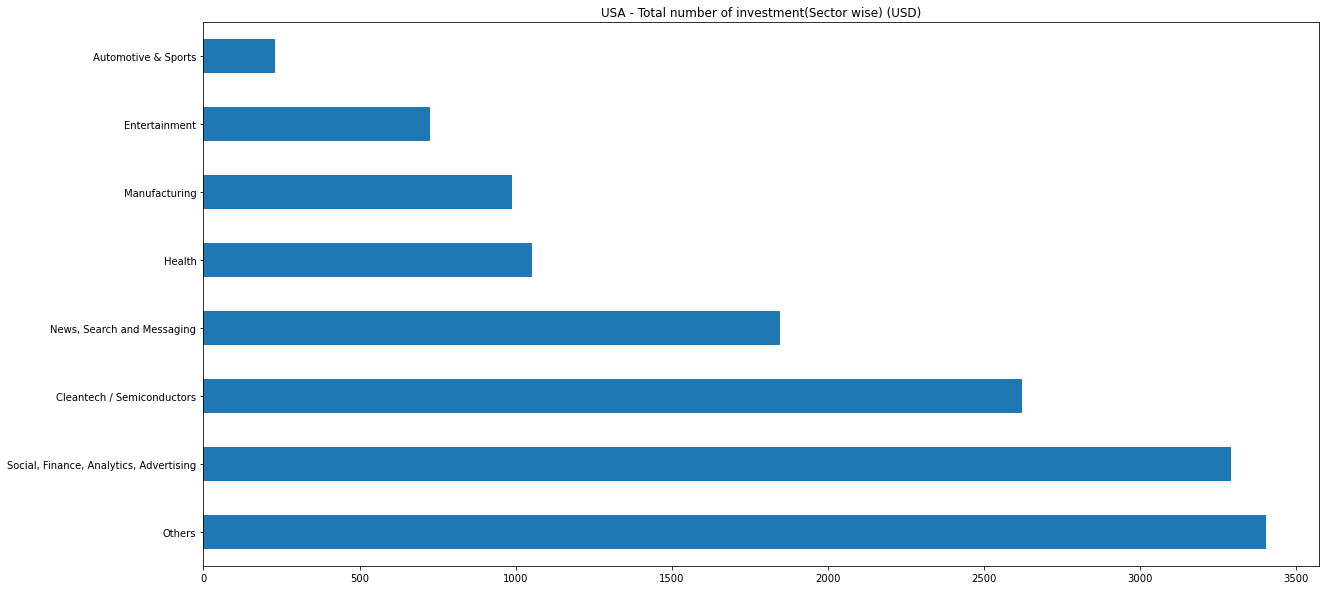

In [1300]:
plt.figure(figsize=(20,10))
plt.title('USA - Total number of investment(Sector wise) (USD)')

D1['main_sector'].value_counts().plot.barh()
plt.show()

In [1272]:
# In USA
# Top Sector name (no. of investment-wise)
# Second Sector name (no. of investment-wise)
# Third Sector name (no. of investment-wise)

D1['main_sector'].value_counts().head(3)

Others                                     3404
Social, Finance, Analytics, Advertising    3290
Cleantech / Semiconductors                 2622
Name: main_sector, dtype: int64

In [1273]:
#In 'Others' sector, list of companies received the highest investment

D1.loc[D1['main_sector'] == 'Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
Virtustream,64300000.0
Tillster,61198945.0
Capella Photonics,54968051.0
AirTight Networks,54201907.0
deCarta,52100000.0
...,...
Domain Holdings Group,5000000.0
Senscio Systems,5000000.0
Sensics,5000000.0


In [1274]:
#In 'Social, Finance, Analytics, Advertising' sector, list of company received the highest investment

D1.loc[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
SST Inc. (Formerly ShotSpotter),67933006.0
Intacct,66800000.0
Demandbase,63000000.0
Powerhouse Dynamics,61300000.0
Lithium Technologies,61000000.0
...,...
Beyond Games,5000000.0
Beyond Meat,5000000.0
Fundly,5000000.0


In [1276]:
#checking Virtustream's investments

D1.loc[D1['name'] == 'Virtustream']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
16182,/organization/virtustream,/funding-round/3354ac55dd5369fa5fb282e7946baadf,venture,08-10-2009,9550000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others
16183,/organization/virtustream,/funding-round/4cdede382a6f29d05b59d833773910ee,venture,07-07-2011,10000000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others
16185,/organization/virtustream,/funding-round/5f44788266cec29ef0ca4a54bf37c805,venture,02-02-2011,9750000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others
16187,/organization/virtustream,/funding-round/ad39aaecd63911d035b37907cebfc3fd,venture,09-03-2012,15000000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others
16188,/organization/virtustream,/funding-round/aeb17cd77f13485b94d9f37409caddeb,venture,08-11-2012,5000000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others
16190,/organization/virtustream,/funding-round/e609500837793f94351a0c77716baa47,venture,02-05-2010,15000000.0,Virtustream,Enterprise Software,acquired,USA,Enterprise software,Others


In [1275]:
#checking Tillster's investments

D1.loc[D1['name'] == 'Tillster']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
15069,/organization/emn8,/funding-round/1805fce81c94cc6678b11fcb500a84ec,venture,12-03-2007,5000000.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15070,/organization/emn8,/funding-round/29912c2302a026aef8c3eb584fa7205b,venture,21-12-2010,12236623.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15071,/organization/emn8,/funding-round/2d196ca032bdde5d590ee365358a3223,venture,25-01-2010,14500000.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15072,/organization/emn8,/funding-round/30bdf8e78bb9c6678d76c8f3d6a208e9,venture,22-08-2003,5000000.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15073,/organization/emn8,/funding-round/7d1cbce3d4d48e4050337ab910fa0e97,venture,12-03-2010,14462322.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15076,/organization/emn8,/funding-round/a752924a7431ec2454fcb10055573b95,venture,30-08-2004,5000000.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others
15077,/organization/emn8,/funding-round/e7a79f38c5b63c455551614bb0f69194,venture,13-02-2007,5000000.0,Tillster,Enterprise Software|Mobile Commerce|Mobile Pay...,operating,USA,Enterprise software,Others


In [1277]:
#checking Payoneer's investments

D1.loc[D1['name'] == 'Payoneer']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
22124,/organization/payoneer,/funding-round/2407fc2385dda5ebba82b29eb04e1887,venture,11-10-2007,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22125,/organization/payoneer,/funding-round/43a5f099daa2d66d3e7ed8b0b029ca0f,venture,28-06-2012,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22126,/organization/payoneer,/funding-round/5e72b93671a9480537db116cdbfa39bd,venture,24-07-2008,8000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22127,/organization/payoneer,/funding-round/846610f20450ed5c2ee5120f8d132f42,venture,31-12-2011,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22128,/organization/payoneer,/funding-round/8db4159d566e3ccb83ec8b2ca11aa9f4,venture,19-09-2013,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22129,/organization/payoneer,/funding-round/948667ff8f690f4749c08211f1fa71c8,venture,05-08-2014,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others
22133,/organization/payoneer,/funding-round/f56fae489db493027a7ef51f9640a6bd,venture,10-06-2014,5000000.0,Payoneer,E-Commerce|Finance|Internet|Mobile|Payments,operating,USA,E-commerce,Others


### Country 2 Analysis - GBR - D2 Dataframe

In [1278]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
63,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.0,Common Interest Communities,Application Platforms|Internet|Software|Startups,operating,GBR,Application platforms,"News, Search and Messaging"
69,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,01-10-2014,5460000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,Application platforms,"News, Search and Messaging"
70,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,05-10-2015,5400000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,Application platforms,"News, Search and Messaging"


In [1279]:
# Total number of investment(count)

D2.shape[0]

845

In [963]:
# Total amount of investment (USD)

D2['raised_amount_usd'].sum()

6499078691.0

In [1282]:
# Top sector (based on count of investments)

D2['main_sector'].value_counts()

Others                                     211
Social, Finance, Analytics, Advertising    193
Cleantech / Semiconductors                 154
News, Search and Messaging                  97
Entertainment                               80
Manufacturing                               52
Health                                      32
Automotive & Sports                         26
Name: main_sector, dtype: int64

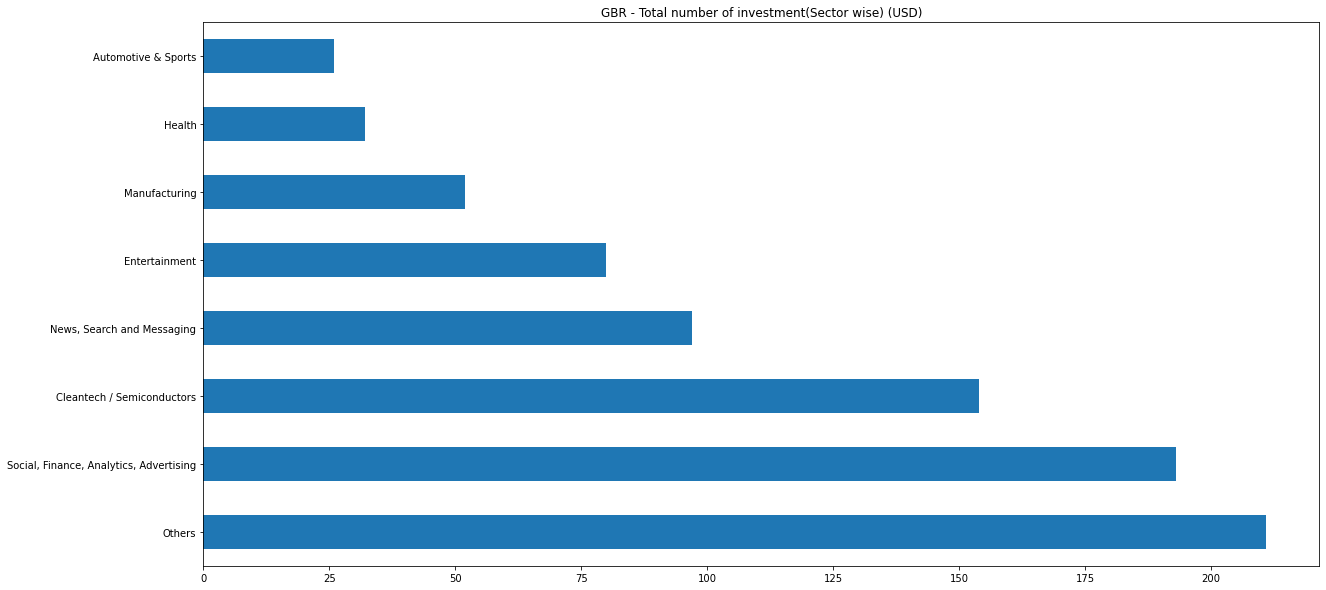

In [1299]:
plt.figure(figsize=(20,10))
plt.title('GBR - Total number of investment(Sector wise) (USD)')

D2['main_sector'].value_counts().plot.barh()
plt.show()

In [1301]:
# Top Sector name (no. of investment-wise)
# Second Sector name (no. of investment-wise)
# Third Sector name (no. of investment-wise)

D2['main_sector'].value_counts().head(3)

Others                                     211
Social, Finance, Analytics, Advertising    193
Cleantech / Semiconductors                 154
Name: main_sector, dtype: int64

In [1285]:
#In 'Others' sector, list of companies received the highest investment

D2.loc[D2['main_sector'] == 'Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
Electric Cloud,37000000.0
Notonthehighstreet,36900000.0
SenSage,36250000.0
Enigmatec,32500000.0
ip.access,30000000.0
...,...
Girl Meets Dress,5000000.0
Getlenses.co.uk,5000000.0
Gekko,5000000.0


In [1292]:
#In 'Social, Finance, Analytics, Advertising' sector, list of companies received the highest investment

D2.loc[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
Zopa,37900000.0
Celltick Technologies,37500000.0
myThings,34000000.0
SumUp,29293649.0
VisualDNA,28550000.0
...,...
Tamoco,5000000.0
TaskPipes,5000000.0
JustPark,5000000.0


### Country 3 Analysis - IND - D3 Dataframe

In [1293]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Media,Entertainment
244,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5000000.0,Ameyo,Software,operating,IND,Software,Others
274,/organization/applabs,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,29-06-2006,10000000.0,AppLabs,Software,acquired,IND,Software,Others
286,/organization/appsdaily-solutions,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,10-04-2014,5000000.0,Appsdaily Solutions,Software,operating,IND,Software,Others
606,/organization/canvera-digital-technologies,/funding-round/26650720abe4be67bb6550fd4ee6d063,venture,29-08-2012,6500000.0,Canvera Digital Technologies,Software,operating,IND,Software,Others


In [970]:
# Total number of investment(count)

D3.shape[0]

493

In [1294]:
# Total amount of investment (USD)

D3['raised_amount_usd'].sum()

3774543602.0

In [1295]:
# Top sector (based on count of investments)

D3['main_sector'].value_counts()

Others                                     158
Social, Finance, Analytics, Advertising    106
News, Search and Messaging                  76
Entertainment                               47
Health                                      33
Manufacturing                               30
Cleantech / Semiconductors                  29
Automotive & Sports                         14
Name: main_sector, dtype: int64

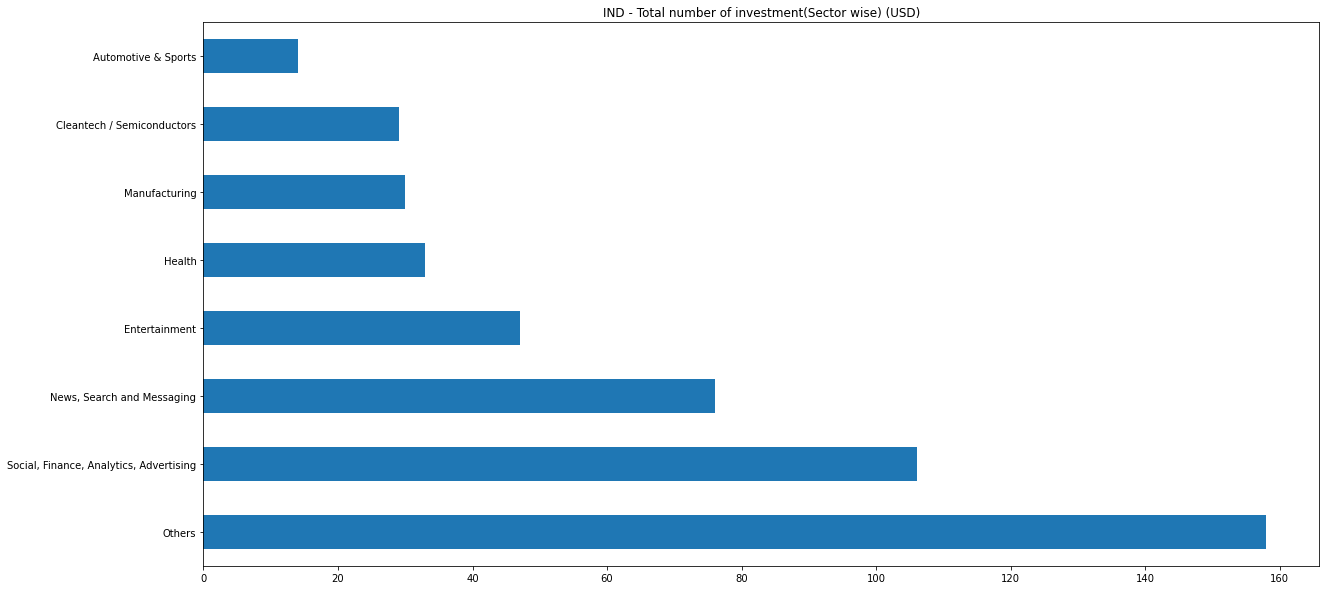

In [1298]:
plt.figure(figsize=(20,10))
plt.title('IND - Total number of investment(Sector wise) (USD)')

D3['main_sector'].value_counts().plot.barh()
plt.show()

In [1302]:
# Top Sector name (no. of investment-wise)
# Second Sector name (no. of investment-wise)
# Third Sector name (no. of investment-wise)

D3['main_sector'].value_counts().head(3)

Others                                     158
Social, Finance, Analytics, Advertising    106
News, Search and Messaging                  76
Name: main_sector, dtype: int64

In [1303]:
#In 'Others' sector, list of companies received the highest investment

D3.loc[D3['main_sector'] == 'Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
FirstCry.com,39000000.0
Myntra,38000000.0
CommonFloor,32900000.0
Pepperfry.com,28000000.0
Maharana Infrastructure and Professional Services Private Limited (MIPS),26600000.0
...,...
FindYahan,5000000.0
Stayzilla,5000000.0
TastyKhana,5000000.0


In [1306]:
#In 'Social, Finance, Analytics, Advertising' sector, list of companies received the highest investment

D3.loc[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False)

,raised_amount_usd
name,
Manthan Systems,50700000.0
Komli Media,28000000.0
ShopClues.com,25000000.0
inTarvo,21900000.0
Grameen Financial Services,21556050.0
...,...
PolicyBazaar,5000000.0
Primaseller,5000000.0
Faircent,5000000.0


In [1305]:
D3.loc[D3['name'] == 'Manthan Systems']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
4360,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,5700000.0,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,"Social, Finance, Analytics, Advertising"
4361,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,15000000.0,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,"Social, Finance, Analytics, Advertising"
4363,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,15-02-2012,15000000.0,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,"Social, Finance, Analytics, Advertising"
4364,/organization/manthan-systems,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,20-11-2009,15000000.0,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,"Social, Finance, Analytics, Advertising"


# Checkpoint 6: Plots

**1. A plot showing the representative amount of investment in each funding type. 
This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds**

Considering that Spark Funds wants to invest between **5 to 15 million USD per investment round** and above analysis, **Venture Funding round type** would be right fit for them

<Figure size 1440x720 with 0 Axes>

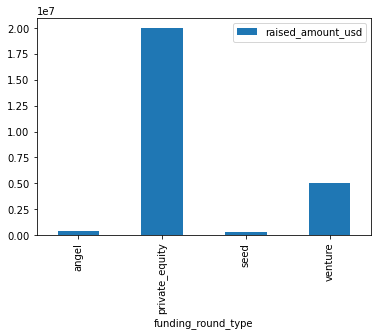

In [1151]:
#Plot for common representative amount of investment in each funding type

plt.figure(figsize=(20,10))

master_frame.groupby('funding_round_type').median().plot.bar()
plt.show()

**2. A plot showing the top 9 countries against the total amount of investments of funding type FT**

**This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear**

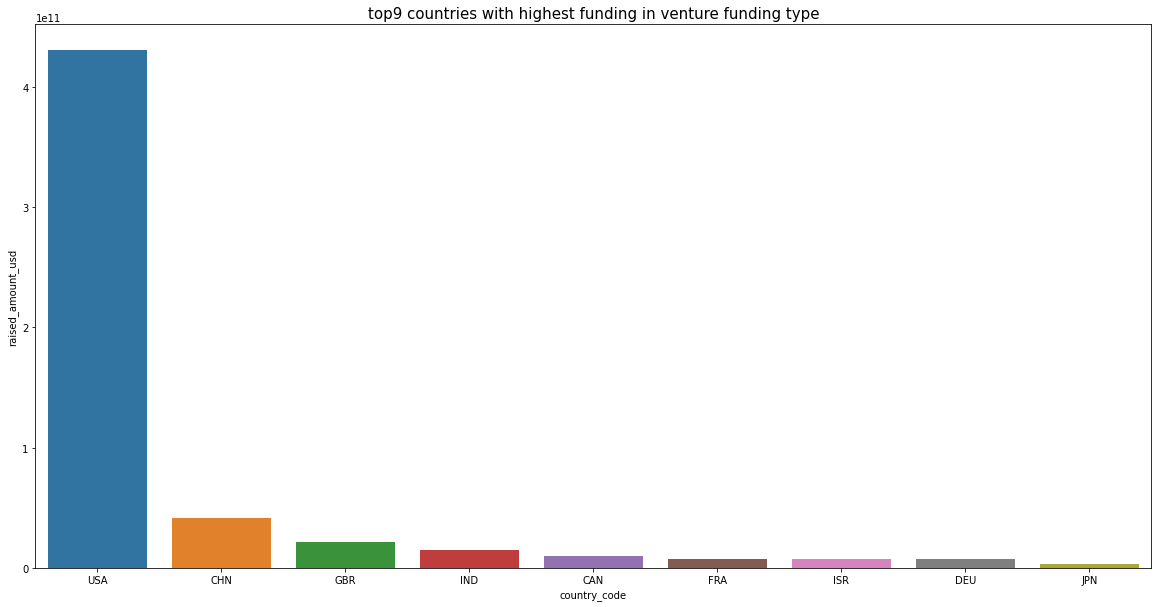

In [1469]:
#Visualisation of top9 countries with highest funding in venture funding type

plt.figure(figsize=(20,10))
plt.title('top9 countries with highest funding in venture funding type',fontsize=15)

sns.barplot(top9['country_code'], top9['raised_amount_usd'])
plt.show()

In [1473]:
#Top3 English-Speaking Countries

#countryCode = ['USA', 'GBR', 'IND']

countryCode

['USA', 'GBR', 'IND']

In [1475]:
#Top3 English-Speaking Countries with 'raised_amount_usd' in 'venture' funding type

top3 = top9.loc[top9['country_code'].isin(countryCode)]

top3

,country_code,funding_round_type,raised_amount_usd
0,USA,venture,4.305230e+11
2,GBR,venture,2.119281e+10
3,IND,venture,1.508651e+10


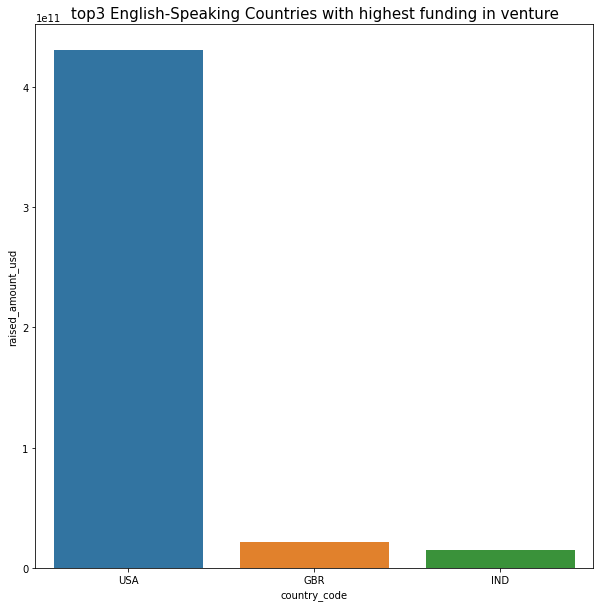

In [1479]:
#Visualisation of top3 countries with highest funding in venture funding type

plt.figure(figsize=(10,10))
plt.title('top3 English-Speaking Countries with highest funding in venture',fontsize=15)

sns.barplot(top3['country_code'], top3['raised_amount_usd'])
plt.show()

**3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)**

**This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.**

In [1375]:
D1['main_sector'].value_counts().head(3)

Others                                     3404
Social, Finance, Analytics, Advertising    3290
Cleantech / Semiconductors                 2622
Name: main_sector, dtype: int64

In [1373]:
D2['main_sector'].value_counts().head(3)

Others                                     211
Social, Finance, Analytics, Advertising    193
Cleantech / Semiconductors                 154
Name: main_sector, dtype: int64

In [1372]:
D3['main_sector'].value_counts().head(3)

Others                                     158
Social, Finance, Analytics, Advertising    106
News, Search and Messaging                  76
Name: main_sector, dtype: int64

In [1410]:
USA_statistics = D1.groupby(['country_code', 'main_sector'])['raised_amount_usd'].describe()

In [1433]:
#choosing the top3 sector in 'USA' with 'country_code', 'main_sector' & 'count'

usa_top3_sector = USA_statistics.sort_values('count', ascending=False).iloc[0:3, 0:1].reset_index()

usa_top3_sector

,country_code,main_sector,count
0,USA,Others,3404.0
1,USA,"Social, Finance, Analytics, Advertising",3290.0
2,USA,Cleantech / Semiconductors,2622.0


In [1430]:
GBR_statistics = D2.groupby(['country_code', 'main_sector'])['raised_amount_usd'].describe()

In [1434]:
#choosing the top3 sector in 'GBR' with 'country_code', 'main_sector' & 'count'

gbr_top3_sector = GBR_statistics.sort_values('count', ascending=False).iloc[0:3, 0:1].reset_index()

gbr_top3_sector

,country_code,main_sector,count
0,GBR,Others,211.0
1,GBR,"Social, Finance, Analytics, Advertising",193.0
2,GBR,Cleantech / Semiconductors,154.0


In [1436]:
IND_statistics = D3.groupby(['country_code', 'main_sector'])['raised_amount_usd'].describe()

In [1438]:
#choosing the top3 sector in 'IND' with 'country_code', 'main_sector' & 'count'

ind_top3_sector = IND_statistics.sort_values('count', ascending=False).iloc[0:3, 0:1].reset_index()

ind_top3_sector

,country_code,main_sector,count
0,IND,Others,158.0
1,IND,"Social, Finance, Analytics, Advertising",106.0
2,IND,"News, Search and Messaging",76.0


In [1441]:
#top 3 sectors of the top 3 countries ('USA', 'GBR', 'IND')

final_main_sector = pd.concat([usa_top3_sector, gbr_top3_sector, ind_top3_sector])

final_main_sector

,country_code,main_sector,count
0,USA,Others,3404.0
1,USA,"Social, Finance, Analytics, Advertising",3290.0
2,USA,Cleantech / Semiconductors,2622.0
0,GBR,Others,211.0
1,GBR,"Social, Finance, Analytics, Advertising",193.0
2,GBR,Cleantech / Semiconductors,154.0
0,IND,Others,158.0
1,IND,"Social, Finance, Analytics, Advertising",106.0
2,IND,"News, Search and Messaging",76.0


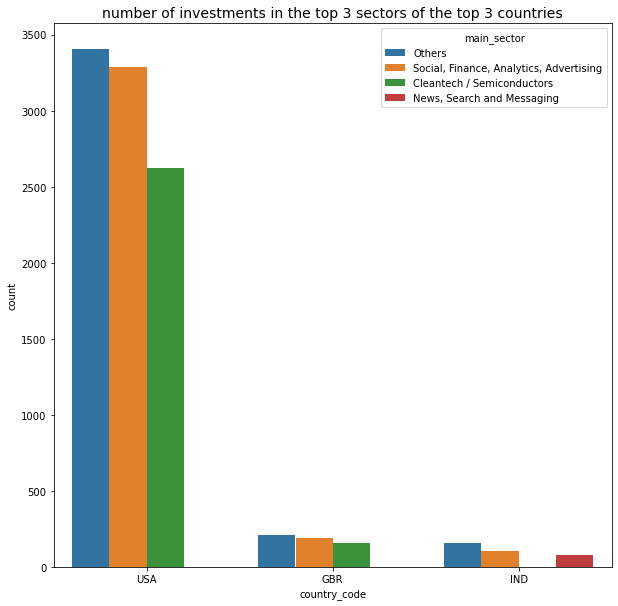

In [1458]:
plt.figure(figsize=(10,10))
plt.title('number of investments in the top 3 sectors of the top 3 countries',fontsize=14)

sns.barplot(x="country_code", y="count", hue="main_sector", data=final_main_sector)
plt.show()